# DESENVOLVIMENTO E EXECUÇÃO DE PROJETOS DE SOFTWARE 2022.2

Docente: Ryan Ribeiro De Azevedo

Dicente: Thiago Fabricio de Oliveira

#Exercicio 02

Para se fazer essa atividade, foi-se utilizado da biblioteca cv2 que se trata do OpenCV, que é uma biblioteca de código aberto amplamente utilizada em aplicações de visão computacional e processamento de imagens, pois ela fornece uma ampla gama de funções e algoritmos para manipular, processar e analisar imagens e vídeos.

Tambem se foi se utilizado o Sklearn afim de utilizar o KMeans para uma analise de cores mais presente na imagem, para ter uma visualização grafica de alguns dados foi se utilizado o Matplotlib e para alguns calculos a biblioteca Numpy.

A proposta para resolução do exercicio, se trata de extrair informações de uma certa imagem com a biblioteca do OpenCV e apos disso fazer uma mostragem dessas informações extraidas, alem de se fazer alguns calculos como das cores que são mais predominantes na imagem.

In [1]:
# Carregamento das biblioteas utilizadas na resolução do exercicio

import cv2
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

## Carregamento da Imagem e Fazendo Analise Inicial da Imagem

Utilizando a biblioteca OpenCV vamos fazer o carregamento da imagem, a parti disso tambem podemos começar a fazer algumas transforamações e analisar algumas caracteristicas dessa imagem.

Imagem carregada com sucesso!


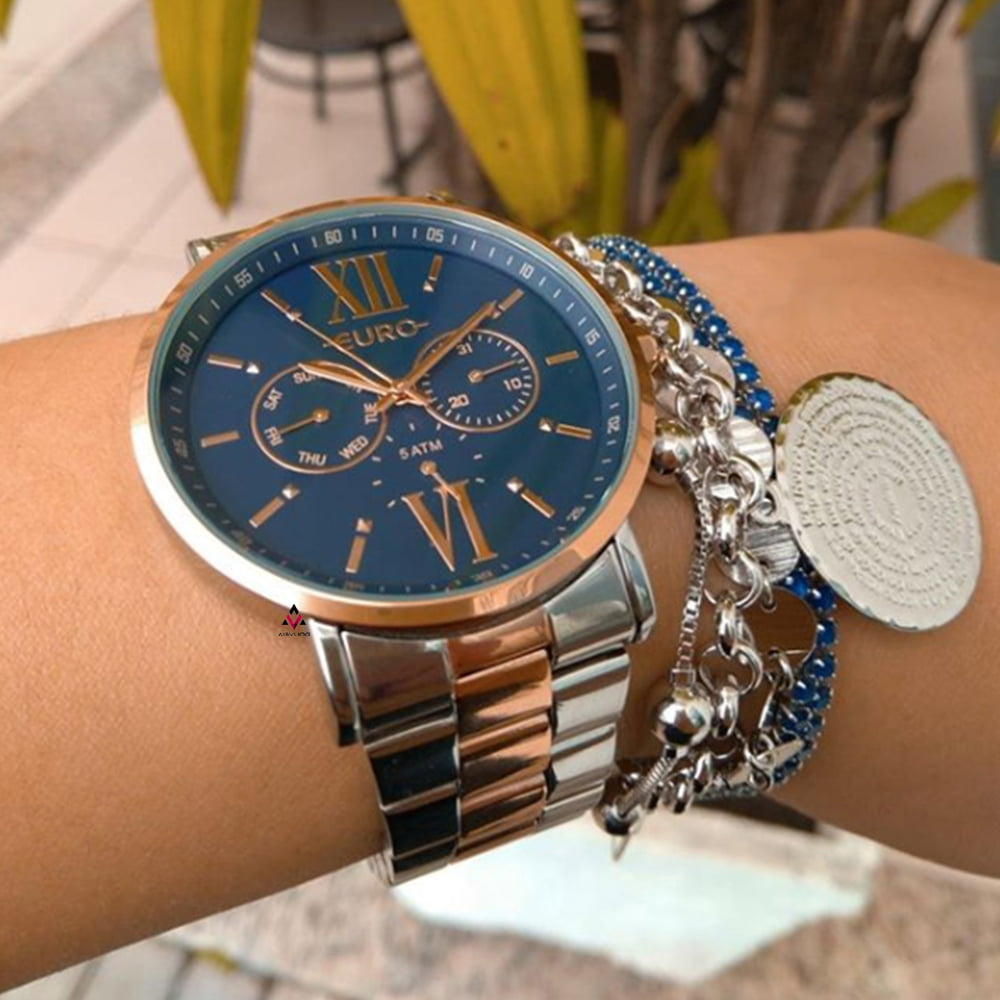

In [2]:
# Carregamento da imagem
imagem = cv2.imread('exercicio-02.jpg')

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    print("Não foi possível carregar a imagem. Verifique o caminho e o formato do arquivo.")
else:
    print("Imagem carregada com sucesso!")

# Exibindo a imagem
cv2_imshow(imagem)

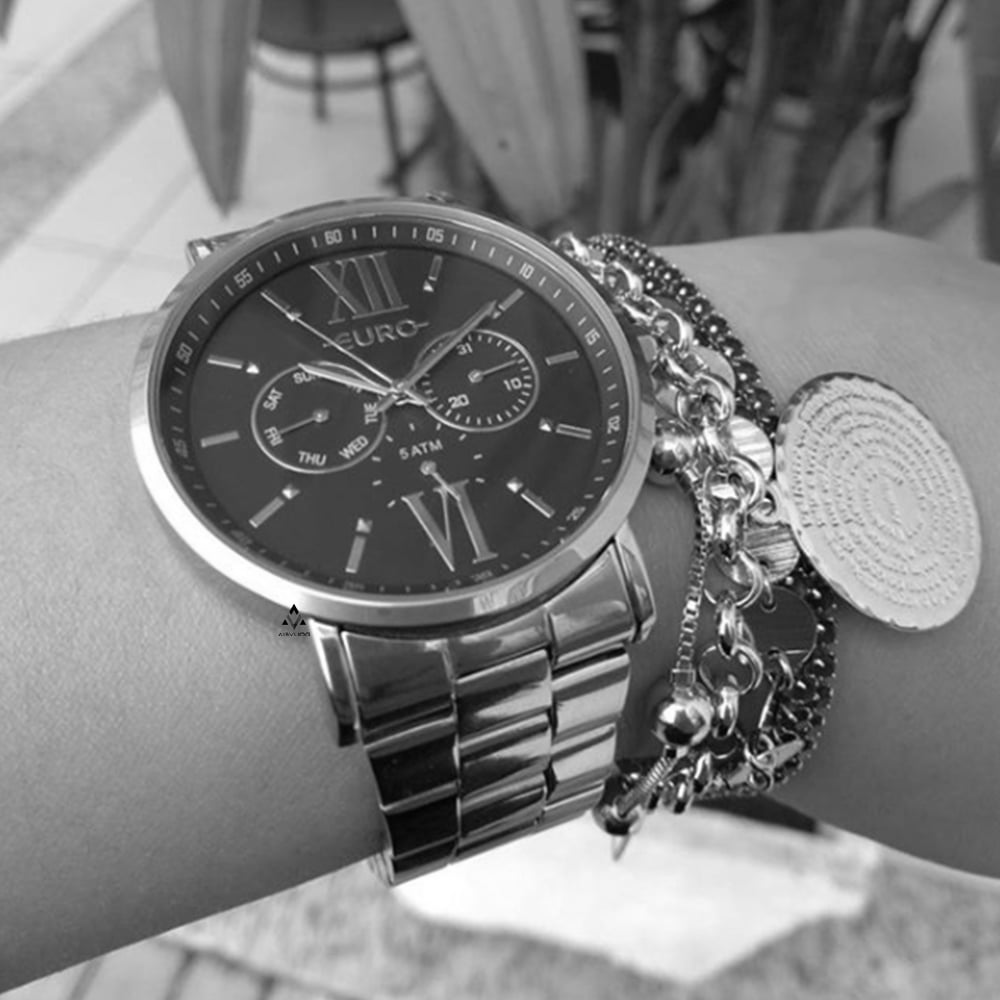

In [3]:
# Convertendo a imagem para escala de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Exibir a imagem em escala de cinza
cv2_imshow(imagem_cinza)

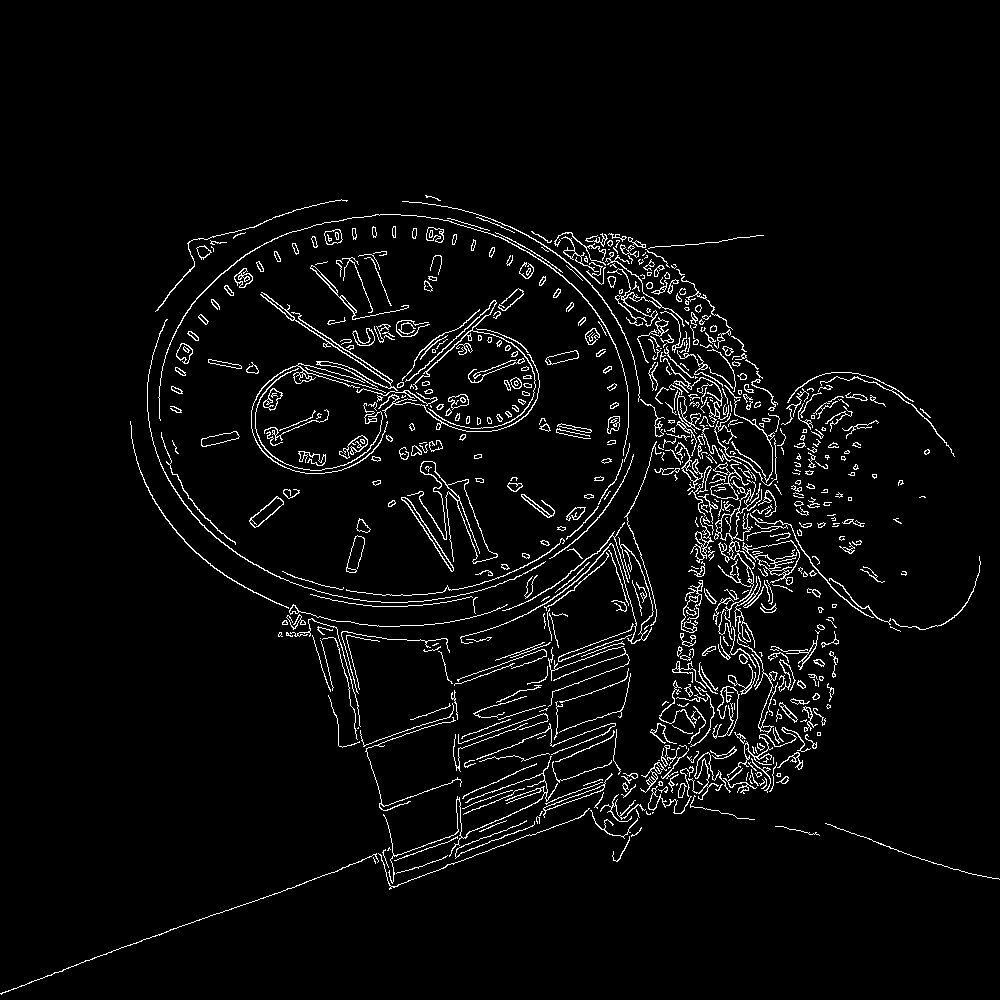

In [4]:
# Aplicar o algoritmo de detecção de bordas de Canny
bordas = cv2.Canny(imagem_cinza, 100, 200)

# Exibindo as bordas detectadas
cv2_imshow(bordas)

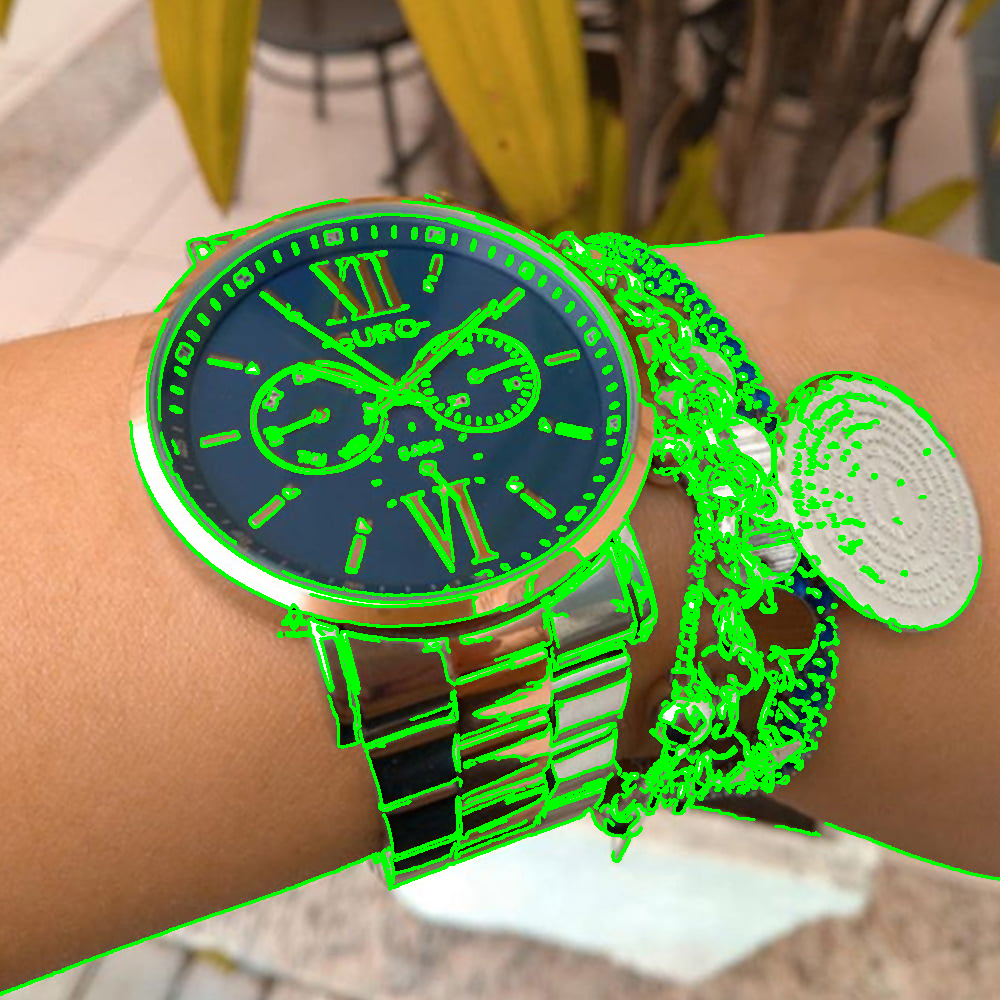

In [5]:
# Encontrando os contornos na imagem
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Desenhando os contornos na imagem original
cv2.drawContours(imagem, contornos, -1, (0, 255, 0), 2)

# Exibindo os contornos encontrados na imagem original
cv2_imshow(imagem)

In [6]:
# Salvar a imagem com os contornos
cv2.imwrite('imagem_contornos.jpg', imagem)

# Salvar a imagem em escala de cinza
cv2.imwrite('imagem_cinza.jpg', imagem_cinza)

# Salvar a imagem das bordas
cv2.imwrite('imagem_bordas.jpg', bordas)

print("Resultados salvos com sucesso!")

Resultados salvos com sucesso!


## Analise das Texturas e Cores Mais Predominantes da Imagem

Proseguindo agora com o auxilio do Sklearn, Matplotlib e o Numpy, vamos fazer uma analise das texturas e cores mais predominantes da imagem.

Para fazer essa analise precisaremos de algumas funções auxiliares, a primeira é uma função que ira fazer a extração das textura da imagem, considernado que a imagem já tenha sido anteriomente transformada em escala.

Dado a consideração acima prosseguimos para Detecção de texturas, para isso vamos utilizar o algoritmo Local Binary Patterns (LBP) que sera aplicado justamente em nossa imagem em escala de cinza. O LBP é um algoritmo popular para detecção de texturas, que calcula um descritor local para cada pixel da imagem, comparando seus valores com os valores de seus vizinhos. A propria biblioteca OpenCV fornece a função cv2.ORB_create() para criar um objeto ORB (Oriented FAST and Rotated BRIEF) que incorpora o LBP. Em seguida, utilizamos a função detectAndCompute() do objeto ORB para extrair os pontos-chave (keypoints) e descritores da imagem. Os keypoints representam os pontos de interesse detectados na imagem, enquanto os descritores são as representações numéricas desses pontos-chave.

Em seguida fazemos a utilização do KMens, um algoritmo de aprendizagem de maquina não supervisionado, para fazer o agrupamento dos descritores, para então podermos obter suas devidas classficações.

E atravez do calculo da centroide do Kmeans, obtemos as texturas que são mais predominantes na imagem.

In [7]:
# Função para extrair as texturas da imagem
def extrair_texturas(imagem, n_clusters):

    # Aplicar o algoritmo de detecção de texturas, como o Local Binary Patterns (LBP)
    lbp = cv2.ORB_create()
    keypoints, descritores = lbp.detectAndCompute(imagem, None)

    # Utilizar o algoritmo K-means para agrupar os descritores
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(descritores)

    # Retornar os centróides dos grupos como as texturas predominantes
    texturas_predominantes = kmeans.cluster_centers_

    return texturas_predominantes

Proseguiremos agora para a analise das cores mais predominantes, fazer essa analise iremos utilizar uma função auxiliar, sendo essa função responsavel por fazer a extração das cores da imagem, considernado que a mesma já tenha sido anteriomente transformada em escala.

Em sua execução a função primeiramente, ira pegar a imagem de entrada é então redimensiona-la, para facilitar o processamento. A imagem é redimensionada para o tamanho 100x100 pixels, com o auxilio da função cv2.resize(). O redimensionamento é útil para causar uma aceleração do algoritmo, pois é reduzido a quantidade de dados que serão processados, especialmente se a imagem original for muito grande.

Após o redimensionamento, a imagem tera de ser convertida do espaço de cores BGR (usado pelo OpenCV) para o espaço de cores RGB. Isso é feito com o auxilio da função cv2.cvtColor() com o parâmetro cv2.COLOR_BGR2RGB. A conversão para o espaço de cores RGB é necessária para que as cores sejam interpretadas corretamente.

Depois desses tratamentos na imagem, a gente prossegue então transformadoa em um vetor unidimensional de pixels. Essa transformação é realizada usando o método reshape() do NumPy, com o argumento -1 para que o tamanho do eixo seja calculado automaticamente. Cada pixel é representado por um array de três valores correspondentes às componentes de cor (vermelho, verde e azul).

Agora com todos os tratamentos feitos, vamos utilizar do algoritmo K-means que sera aplicado aos pixels da imagem para agrupá-los em clusters de cores predominantes. O número de clusters n_cores é especificado como parâmetro da função. O Após esse agrupamento, o algoritmo K-means ira calcula os centróides de cada cluster. Por fim, os centróides dos clusters são retornados como as cores predominantes da imagem. Esses centróides representam as cores mais proeminentes encontradas na imagem.


In [8]:
# Função para extrair as cores predominantes da imagem
def extrair_cores_predominantes(imagem, n_cores):
    # Redimensionar a imagem para facilitar o processamento
    imagem_redimensionada = cv2.resize(imagem, (100, 100))

    # Converter a imagem para o espaço de cores RGB
    imagem_rgb = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_BGR2RGB)

    # Transformar a imagem em um vetor de pixels
    pixels = imagem_rgb.reshape(-1, 3)

    # Utilizar o algoritmo K-means para agrupar os pixels em clusters de cores
    kmeans = KMeans(n_clusters=n_cores)
    kmeans.fit(pixels)

    # Retornar os centróides dos clusters como as cores predominantes
    cores_predominantes = kmeans.cluster_centers_

    return cores_predominantes.astype(int)

# Função para realizar a amostragem das cores predominantes
def amostrar_cores(cores_predominantes):
    # Criar uma imagem em branco para exibir as amostras de cores
    amostra_cores = np.zeros((100, 100 * len(cores_predominantes), 3), dtype=np.uint8)

    # Preencher a imagem com as amostras de cores
    for i, cor in enumerate(cores_predominantes):
        amostra_cores[:, i * 100:(i + 1) * 100, :] = cor

    # Exibir as amostras de cores
    plt.figure(figsize=(8, 4))
    plt.imshow(amostra_cores)
    plt.axis('off')
    plt.show()

A seguit chamamos as funções acima e assim podemos ver as suas respectivas execuções e os respectivos resultados obtidos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Texturas predominantes:
[[163.08333333 100.89285714 126.05952381 114.98809524 104.54761905
   60.44047619 114.47619048 107.58333333 102.61904762 156.1547619
  163.66666667 129.19047619 154.03571429  65.77380952 110.96428571
  127.82142857  83.73809524 183.75       121.47619048 153.16666667
  147.05952381 167.11904762 142.83333333  63.98809524 153.72619048
  185.08333333 132.10714286  84.78571429 114.69047619 194.86904762
   88.11904762  89.42857143]
 [123.89256198 141.83471074 131.81818182 114.04132231 107.15702479
  142.54545455  83.56198347 114.85950413 152.2892562  146.66115702
  142.31404959  51.50413223 151.31404959 148.26446281  64.21487603
   81.31404959 130.04958678 136.46280992 145.95867769  63.66942149
   69.0661157  123.68595041 172.61983471  50.55371901 199.66115702
  194.98347107  67.02479339  76.19834711 127.61983471  96.88429752
  119.62809917  82.01652893]
 [ 87.85555556 143.38888889 110.25555556 144.75555556 140.11111111
  161.63333333 199.43333333 148.04444444 121.455

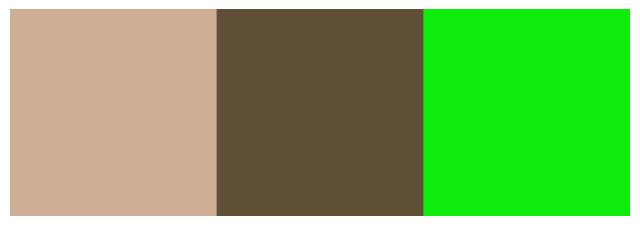

In [9]:
# Definir o número de clusters para as texturas e cores
n_texturas = 5
n_cores = 3

# Extrair as texturas predominantes
texturas = extrair_texturas(imagem_cinza, n_texturas)

# Extrair as cores predominantes
cores = extrair_cores_predominantes(imagem, n_cores)

# Exibir as texturas e cores predominantes
print("Texturas predominantes:")
print(texturas)
print("\nCores predominantes:")
print(cores)

# Chamar a função para amostrar as cores predominantes
amostrar_cores(cores)